In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
from sklearn.cluster import KMeans
from nltk.corpus import stopwords


Load Data

In [2]:
file_path = '/Users/mariakatarachia/Documents/Business_Analytics_Project/olist_order_reviews_dataset.csv'

with open(file_path, 'r') as f:
    df = pd.read_csv(f)

Check for missing values 

In [3]:
df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


## Handling of missing values 

In [4]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


Exclude the Nan rows

In [5]:
df = df.dropna()


In [6]:
# Remove rows with missing values
df = df.dropna(subset=['review_comment_title', 'review_comment_message'])


In [7]:
df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,Loja nota 10,2018-07-10 00:00:00,2018-07-11 14:10:25
34,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,Recebi exatamente o que esperava. As demais en...,2018-06-07 00:00:00,2018-06-09 18:44:02
...,...,...,...,...,...,...,...
99187,47e0954e156dac6512c25c6d2ecc1c66,16cbf959cfdb88c47ee2a29303547ec2,5,Nota máxima!,"Muito obrigado,\n\nExcelente atendimento,barat...",2018-05-22 00:00:00,2018-05-23 00:51:43
99192,0e7bc73fde6782891898ea71443f9904,bd78f91afbb1ecbc6124974c5e813043,4,👍,Aprovado!,2018-07-04 00:00:00,2018-07-05 00:25:13
99196,58be140ccdc12e8908ff7fd2ba5c7cb0,0ebf8e35b9807ee2d717922d5663ccdb,5,muito bom produto,"Ficamos muito satisfeitos com o produto, atend...",2018-06-30 00:00:00,2018-07-02 23:09:35
99197,51de4e06a6b701cb2be47ea0e689437b,b7467ae483dbe956fe9acdf0b1e6e3f4,3,Não foi entregue o pedido,Bom dia \nDas 6 unidades compradas só recebi 4...,2018-06-05 00:00:00,2018-06-06 10:52:19


NLP for customer reviews

Start cleaning the data in order to avoid mistakes in my analysis

Remove HTML and URL links: Customer reviews may contain HTML tags and URLs.

In [10]:
import re

df['review_comment_message'] = df['review_comment_message'].apply(lambda x: re.sub(r'<.*?>', '', x))

df['review_comment_message'] = df['review_comment_message'].apply(lambda x: re.sub(r'http\S+', '', x))


Remove special characters and punctuation: Remove special characters, punctuation, and non-alphanumeric characters.

In [11]:
df['review_comment_message'] = df['review_comment_message'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))


In [12]:
# Define a function to convert a list of words into a single string
def list_to_string(word_list):
    return ' '.join(word_list) if isinstance(word_list, list) else word_list

df['review_comment_message'] = df['review_comment_message'].apply(list_to_string)

df['review_comment_message'] = df['review_comment_message'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))




In [13]:
df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente no site a marca do aparelho...,2018-05-22 00:00:00,2018-05-23 16:45:47
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,Vendedor confivel produto ok e entrega antes d...,2018-05-23 00:00:00,2018-05-24 03:00:01
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Pssimo,2018-08-15 00:00:00,2018-08-15 04:10:37
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,Loja nota 10,2018-07-10 00:00:00,2018-07-11 14:10:25
34,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,Recebi exatamente o que esperava As demais enc...,2018-06-07 00:00:00,2018-06-09 18:44:02
...,...,...,...,...,...,...,...
99187,47e0954e156dac6512c25c6d2ecc1c66,16cbf959cfdb88c47ee2a29303547ec2,5,Nota máxima!,Muito obrigado\n\nExcelente atendimentobarathe...,2018-05-22 00:00:00,2018-05-23 00:51:43
99192,0e7bc73fde6782891898ea71443f9904,bd78f91afbb1ecbc6124974c5e813043,4,👍,Aprovado,2018-07-04 00:00:00,2018-07-05 00:25:13
99196,58be140ccdc12e8908ff7fd2ba5c7cb0,0ebf8e35b9807ee2d717922d5663ccdb,5,muito bom produto,Ficamos muito satisfeitos com o produto atende...,2018-06-30 00:00:00,2018-07-02 23:09:35
99197,51de4e06a6b701cb2be47ea0e689437b,b7467ae483dbe956fe9acdf0b1e6e3f4,3,Não foi entregue o pedido,Bom dia \nDas 6 unidades compradas s recebi 4 ...,2018-06-05 00:00:00,2018-06-06 10:52:19


Lowercase text: Convert all text to lowercase to ensure consistency in the analysis.

In [14]:
df['review_comment_message'] = df['review_comment_message'].str.lower()


Tokenization: Tokenize the text into words or tokens.

In [15]:
import nltk
from nltk.tokenize import word_tokenize

df['review_comment_message'] = df['review_comment_message'].apply(lambda x: word_tokenize(x))


Remove stop words: Remove common stop words like "the," "and," "in," etc., which may not provide valuable information for analysis.

In [16]:
# Examples of some portuguese stopwords
pt_stopwords = stopwords.words('portuguese')
print(f'Total portuguese stopwords in the nltk.corpous module: {len(pt_stopwords)}')
pt_stopwords[:10]

Total portuguese stopwords in the nltk.corpous module: 207


['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as']

In [17]:
# Defining a function to remove the stopwords and to lower the comments
def stopwords_removal(text, cached_stopwords=stopwords.words('portuguese')):
    """
    Args:
    ----------
    text: list object where the stopwords will be removed [type: list]
    cached_stopwords: stopwords to be applied on the process [type: list, default: stopwords.words('portuguese')]
    """
    
    return [c.lower() for c in text.split() if c.lower() not in cached_stopwords]

In [18]:
# Apply stopwords_removal function to the 'review_comment_message' column
df['review_comment_message'] = df['review_comment_message'].apply(lambda x: stopwords_removal(' '.join(x)))

print(df['review_comment_message'])



9        [aparelho, eficiente, site, marca, aparelho, i...
15       [vendedor, confivel, produto, ok, entrega, ant...
19                                                [pssimo]
22                                        [loja, nota, 10]
34       [recebi, exatamente, esperava, demais, encomen...
                               ...                        
99187    [obrigado, excelente, atendimentobaratheon, fo...
99192                                           [aprovado]
99196    [ficamos, satisfeitos, produto, atende, s, nec...
99197    [bom, dia, 6, unidades, compradas, s, recebi, ...
99200    [foto, diferente, principalmente, graninha, si...
Name: review_comment_message, Length: 9839, dtype: object


In [19]:
df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,"[aparelho, eficiente, site, marca, aparelho, i...",2018-05-22 00:00:00,2018-05-23 16:45:47
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"[vendedor, confivel, produto, ok, entrega, ant...",2018-05-23 00:00:00,2018-05-24 03:00:01
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,[pssimo],2018-08-15 00:00:00,2018-08-15 04:10:37
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,"[loja, nota, 10]",2018-07-10 00:00:00,2018-07-11 14:10:25
34,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,"[recebi, exatamente, esperava, demais, encomen...",2018-06-07 00:00:00,2018-06-09 18:44:02
...,...,...,...,...,...,...,...
99187,47e0954e156dac6512c25c6d2ecc1c66,16cbf959cfdb88c47ee2a29303547ec2,5,Nota máxima!,"[obrigado, excelente, atendimentobaratheon, fo...",2018-05-22 00:00:00,2018-05-23 00:51:43
99192,0e7bc73fde6782891898ea71443f9904,bd78f91afbb1ecbc6124974c5e813043,4,👍,[aprovado],2018-07-04 00:00:00,2018-07-05 00:25:13
99196,58be140ccdc12e8908ff7fd2ba5c7cb0,0ebf8e35b9807ee2d717922d5663ccdb,5,muito bom produto,"[ficamos, satisfeitos, produto, atende, s, nec...",2018-06-30 00:00:00,2018-07-02 23:09:35
99197,51de4e06a6b701cb2be47ea0e689437b,b7467ae483dbe956fe9acdf0b1e6e3f4,3,Não foi entregue o pedido,"[bom, dia, 6, unidades, compradas, s, recebi, ...",2018-06-05 00:00:00,2018-06-06 10:52:19


Stemming, reduce words to their base or root form.

In [20]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df['review_comment_message'] = df['review_comment_message'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


Replace any date pattern with the string data.

In [21]:
def re_dates(text_list):
    pattern = r'([0-2][0-9]|(3)[0-1])(/|\.)(((0)[0-9])|((1)[0-2]))(/|\.)\d{2,4}'
    return [re.sub(pattern, 'data', text) for text in text_list]

In [22]:
# Define the re_dates function
def re_dates(text_list):
    pattern = r'([0-2][0-9]|(3)[0-1])(/|\.)(((0)[0-9])|((1)[0-2]))(/|\.)\d{2,4}'
    return [re.sub(pattern, 'data', text) if isinstance(text, str) else text for text in text_list]


df['review_comment_title'] = re_dates(df['review_comment_title'].tolist())
df['review_comment_message'] = re_dates(df['review_comment_message'].tolist())

print(df)


                              review_id                          order_id  \
9      8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
15     3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   
19     373cbeecea8286a2b66c97b1b157ec46  583174fbe37d3d5f0d6661be3aad1786   
22     d21bbc789670eab777d27372ab9094cc  4fc44d78867142c627497b60a7e0228a   
34     c92cdd7dd544a01aa35137f901669cdf  37e7875cdce5a9e5b3a692971f370151   
...                                 ...                               ...   
99187  47e0954e156dac6512c25c6d2ecc1c66  16cbf959cfdb88c47ee2a29303547ec2   
99192  0e7bc73fde6782891898ea71443f9904  bd78f91afbb1ecbc6124974c5e813043   
99196  58be140ccdc12e8908ff7fd2ba5c7cb0  0ebf8e35b9807ee2d717922d5663ccdb   
99197  51de4e06a6b701cb2be47ea0e689437b  b7467ae483dbe956fe9acdf0b1e6e3f4   
99200  2ee221b28e5b6fceffac59487ed39348  f2d12dd37eaef72ed7b1186b2edefbcd   

       review_score       review_comment_title  \
9                 4      

Remove the symbols of money from the dataset

In [23]:
# Define the re_money function
def re_money(text_list):
    pattern = r'[R]{0,1}\$[ ]{0,}\d+(,|\.)\d+'
    return [re.sub(pattern, 'dinheiro', text) if isinstance(text, str) else text for text in text_list]

In [24]:
# Apply the re_money function to 'review_comment_message' column
df['review_comment_message'] = re_money(df['review_comment_message'].tolist())

print(df)


                              review_id                          order_id  \
9      8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
15     3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   
19     373cbeecea8286a2b66c97b1b157ec46  583174fbe37d3d5f0d6661be3aad1786   
22     d21bbc789670eab777d27372ab9094cc  4fc44d78867142c627497b60a7e0228a   
34     c92cdd7dd544a01aa35137f901669cdf  37e7875cdce5a9e5b3a692971f370151   
...                                 ...                               ...   
99187  47e0954e156dac6512c25c6d2ecc1c66  16cbf959cfdb88c47ee2a29303547ec2   
99192  0e7bc73fde6782891898ea71443f9904  bd78f91afbb1ecbc6124974c5e813043   
99196  58be140ccdc12e8908ff7fd2ba5c7cb0  0ebf8e35b9807ee2d717922d5663ccdb   
99197  51de4e06a6b701cb2be47ea0e689437b  b7467ae483dbe956fe9acdf0b1e6e3f4   
99200  2ee221b28e5b6fceffac59487ed39348  f2d12dd37eaef72ed7b1186b2edefbcd   

       review_score       review_comment_title  \
9                 4      

Remove extra spaces

In [151]:
# Define a function to remove extra spaces
def remove_extra_spaces(text_list):
    return [re.sub(r'\s+', ' ', text) if isinstance(text, str) else text for text in text_list]


In [152]:
# Apply the remove_extra_spaces function to 'review_comment_message' column
df['review_comment_message'] = remove_extra_spaces(df['review_comment_message'].tolist())


Replace negation words

In [25]:
## Define the re_negation function
def re_negation(text_list):
    negation_words = [
        'não', 'ñ', 'n',
        'jamais', 'nunca', 'ninguém',
    ]
    
    
    pattern = r'\b(?:' + '|'.join(re.escape(word) for word in negation_words) + r')\b'
    
    return [re.sub(pattern, 'negação', text, flags=re.IGNORECASE) if isinstance(text, str) else text for text in text_list]


In [26]:
# Apply the re_negation function to 'review_comment_message' column
df['review_comment_message'] = re_negation(df['review_comment_message'].tolist())



In [27]:
df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,"[aparelho, eficiente, site, marca, aparelho, i...",2018-05-22 00:00:00,2018-05-23 16:45:47
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"[vendedor, confivel, produto, ok, entrega, ant...",2018-05-23 00:00:00,2018-05-24 03:00:01
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,[pssimo],2018-08-15 00:00:00,2018-08-15 04:10:37
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,"[loja, nota, 10]",2018-07-10 00:00:00,2018-07-11 14:10:25
34,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,"[recebi, exatamente, esperava, demais, encomen...",2018-06-07 00:00:00,2018-06-09 18:44:02
...,...,...,...,...,...,...,...
99187,47e0954e156dac6512c25c6d2ecc1c66,16cbf959cfdb88c47ee2a29303547ec2,5,Nota máxima!,"[obrigado, excelente, atendimentobaratheon, fo...",2018-05-22 00:00:00,2018-05-23 00:51:43
99192,0e7bc73fde6782891898ea71443f9904,bd78f91afbb1ecbc6124974c5e813043,4,👍,[aprovado],2018-07-04 00:00:00,2018-07-05 00:25:13
99196,58be140ccdc12e8908ff7fd2ba5c7cb0,0ebf8e35b9807ee2d717922d5663ccdb,5,muito bom produto,"[ficamos, satisfeitos, produto, atende, s, nec...",2018-06-30 00:00:00,2018-07-02 23:09:35
99197,51de4e06a6b701cb2be47ea0e689437b,b7467ae483dbe956fe9acdf0b1e6e3f4,3,Não foi entregue o pedido,"[bom, dia, 6, unidades, compradas, s, recebi, ...",2018-06-05 00:00:00,2018-06-06 10:52:19


Replace numerical values with the string 'numero'.

In [28]:
# Define the replace_numbers function
def replace_numbers(text_list):
    pattern = r'\d+'
    
    
    text = ' '.join(text_list) if isinstance(text_list, list) else text_list
    
    
    text = re.sub(pattern, 'numero', text)
    
    return text

In [29]:
# Apply the replace_numbers function to 'review_comment_message' column
df['review_comment_message'] = df['review_comment_message'].apply(replace_numbers)


In [30]:
df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente site marca aparelho impress...,2018-05-22 00:00:00,2018-05-23 16:45:47
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,vendedor confivel produto ok entrega ante prazo,2018-05-23 00:00:00,2018-05-24 03:00:01
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,pssimo,2018-08-15 00:00:00,2018-08-15 04:10:37
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,loja nota numero,2018-07-10 00:00:00,2018-07-11 14:10:25
34,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,recebi exatamente esperava demais encomendas o...,2018-06-07 00:00:00,2018-06-09 18:44:02
...,...,...,...,...,...,...,...
99187,47e0954e156dac6512c25c6d2ecc1c66,16cbf959cfdb88c47ee2a29303547ec2,5,Nota máxima!,obrigado excelente atendimentobaratheon fornec...,2018-05-22 00:00:00,2018-05-23 00:51:43
99192,0e7bc73fde6782891898ea71443f9904,bd78f91afbb1ecbc6124974c5e813043,4,👍,aprovado,2018-07-04 00:00:00,2018-07-05 00:25:13
99196,58be140ccdc12e8908ff7fd2ba5c7cb0,0ebf8e35b9807ee2d717922d5663ccdb,5,muito bom produto,ficamos satisfeitos produto atende s necessida...,2018-06-30 00:00:00,2018-07-02 23:09:35
99197,51de4e06a6b701cb2be47ea0e689437b,b7467ae483dbe956fe9acdf0b1e6e3f4,3,Não foi entregue o pedido,bom dia numero unidades compradas s recebi num...,2018-06-05 00:00:00,2018-06-06 10:52:19


Plotting Review scores.

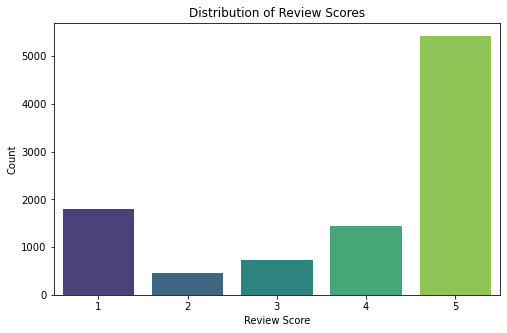

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of review scores
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="review_score", palette="viridis")
plt.title("Distribution of Review Scores")
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.show()

Plotting the most common words.

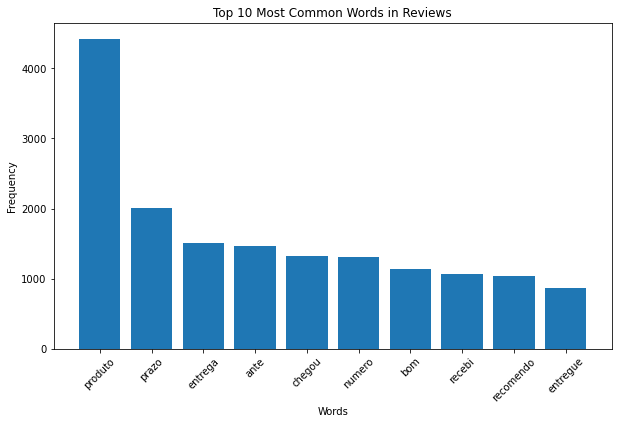

In [32]:
from collections import Counter

# Tokenize and preprocess the text first
words = ' '.join(df['review_comment_message']).split()
word_counts = Counter(words)
common_words = word_counts.most_common(10)

plt.figure(figsize=(10, 6))
plt.bar(*zip(*common_words))
plt.title('Top 10 Most Common Words in Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

I use the TextBlob library to perform sentiment analysis on the 'review_comment_message' column, assigning sentiments (Positive, Neutral, or Negative) to each entry, and provides a summary of sentiment distribution in the Data.

In [33]:
from textblob import TextBlob

# Create a function to perform sentiment analysis and classify the sentiment
def classify_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity == 0:
        return "Neutral"
    else:
        return "Negative"


df['sentiment'] = df['review_comment_message'].apply(classify_sentiment)


print(df[['review_comment_message', 'sentiment']].head())


sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)


                               review_comment_message sentiment
9   aparelho eficiente site marca aparelho impress...   Neutral
15    vendedor confivel produto ok entrega ante prazo  Positive
19                                             pssimo   Neutral
22                                   loja nota numero   Neutral
34  recebi exatamente esperava demais encomendas o...   Neutral
Neutral     8957
Positive     789
Negative      93
Name: sentiment, dtype: int64


Plotting the length of the reviews, positive and negative in order to compare them.

Positive Reviews Mean Score: 4.790955506929249
Negative Reviews Mean Score: 1.2038273253226524


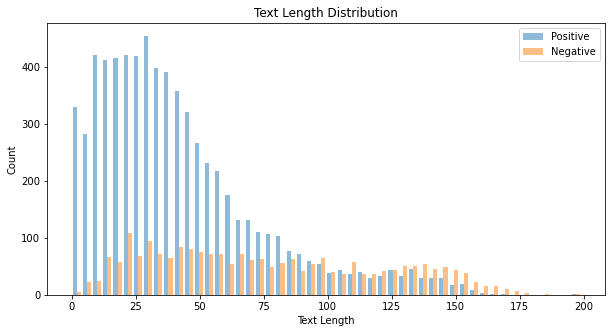

In [34]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate text lengths
df['text_length'] = df['review_comment_message'].str.len()

#Calculate the statistics
positive_reviews = df[df['review_score'] >= 4]
negative_reviews = df[df['review_score'] <= 2]
print("Positive Reviews Mean Score:", positive_reviews['review_score'].mean())
print("Negative Reviews Mean Score:", negative_reviews['review_score'].mean())

# Text length analysis
plt.figure(figsize=(10, 5))
plt.hist([positive_reviews['text_length'], negative_reviews['text_length']], bins=50, alpha=0.5, label=['Positive', 'Negative'])
plt.legend()
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()


Plotting the 10 most frequent words, positive and negative.

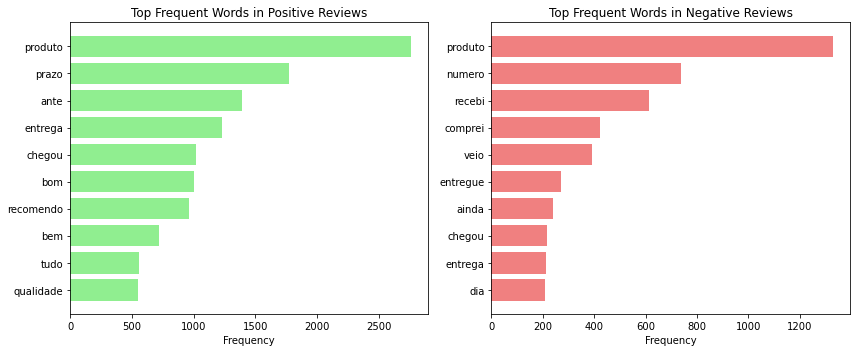

In [36]:
from collections import Counter
import matplotlib.pyplot as plt


positive_words = ' '.join(positive_reviews['review_comment_message']).split()
positive_word_counts = Counter(positive_words)
negative_words = ' '.join(negative_reviews['review_comment_message']).split()
negative_word_counts = Counter(negative_words)

#top N most frequent words
top_n = 10


top_positive_words = [word for word, freq in positive_word_counts.most_common(top_n)]
top_positive_freqs = [freq for word, freq in positive_word_counts.most_common(top_n)]
top_negative_words = [word for word, freq in negative_word_counts.most_common(top_n)]
top_negative_freqs = [freq for word, freq in negative_word_counts.most_common(top_n)]

# Create bar charts for positive and negative frequent words
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.barh(top_positive_words, top_positive_freqs, color='lightgreen')
plt.title('Top Frequent Words in Positive Reviews')
plt.xlabel('Frequency')
plt.gca().invert_yaxis()  

plt.subplot(1, 2, 2)
plt.barh(top_negative_words, top_negative_freqs, color='lightcoral')
plt.title('Top Frequent Words in Negative Reviews')
plt.xlabel('Frequency')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariakatarachia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


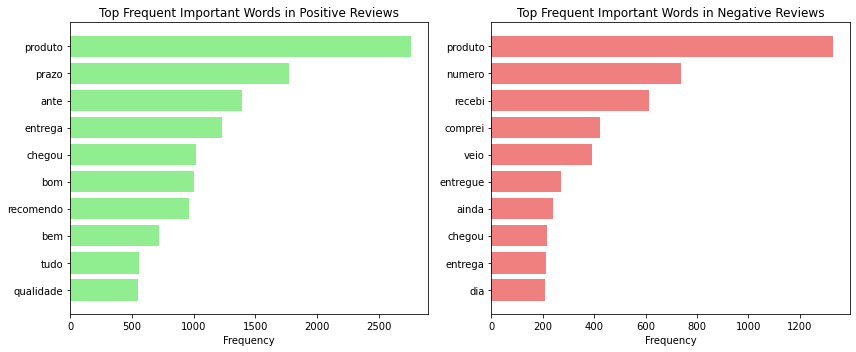

In [37]:
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')

#NLTK's English stop words, since our dataset is in portuguese
stop_words = set(stopwords.words('english'))

# Tokenize and count words in reviews, excluding stop words
positive_words = word_tokenize(' '.join(positive_reviews['review_comment_message']))
positive_words = [word.lower() for word in positive_words if word.lower() not in stop_words]
positive_word_counts = Counter(positive_words)
negative_words = word_tokenize(' '.join(negative_reviews['review_comment_message']))
negative_words = [word.lower() for word in negative_words if word.lower() not in stop_words]
negative_word_counts = Counter(negative_words)

#top N most frequent important words
top_n = 10

# Get the most common words and their frequencies
top_positive_words = [word for word, freq in positive_word_counts.most_common(top_n)]
top_positive_freqs = [freq for word, freq in positive_word_counts.most_common(top_n)]
top_negative_words = [word for word, freq in negative_word_counts.most_common(top_n)]
top_negative_freqs = [freq for word, freq in negative_word_counts.most_common(top_n)]

#bar charts for positive and negative frequent important words
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.barh(top_positive_words, top_positive_freqs, color='lightgreen')
plt.title('Top Frequent Important Words in Positive Reviews')
plt.xlabel('Frequency')
plt.gca().invert_yaxis()  

plt.subplot(1, 2, 2)
plt.barh(top_negative_words, top_negative_freqs, color='lightcoral')
plt.title('Top Frequent Important Words in Negative Reviews')
plt.xlabel('Frequency')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


## Most frequent words

In [38]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

reviews = df['review_comment_message']

words = [word.lower() for review in reviews for word in word_tokenize(review) if word.lower() not in stop_words]

#frequencies
word_counts = Counter(words)

#three most common words
top_words = word_counts.most_common(3)

print("The three most frequent words in the reviews are:")
for word, count in top_words:
    print(f"{word}: {count} times")


The three most frequent words in the reviews are:
produto: 4424 times
prazo: 2004 times
entrega: 1518 times


In [39]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Tokenize and count words in reviews, excluding stop words
positive_words = [word.lower() for review in positive_reviews['review_comment_message'] for word in word_tokenize(review) if word.lower() not in stop_words]
negative_words = [word.lower() for review in negative_reviews['review_comment_message'] for word in word_tokenize(review) if word.lower() not in stop_words]

# Count word frequencies in both positive and negative reviews
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

#three most common words that appear in both positive and negative reviews
common_words = (positive_word_counts & negative_word_counts).most_common(3)

print("The three most frequent words in both positive and negative reviews are:")
for word, count in common_words:
    print(f"{word}: {count} times")


The three most frequent words in both positive and negative reviews are:
produto: 1327 times
numero: 424 times
recebi: 346 times


In [40]:
from nltk.util import ngrams
import nltk
nltk.download('stopwords')

#English stop words, because our dataset is in english
stop_words = set(stopwords.words('english'))

#function to tokenize text and remove stop words
def tokenize_and_filter(text):
    words = word_tokenize(text)
    return [word.lower() for word in words if word.lower() not in stop_words]

positive_reviews['filtered_text'] = positive_reviews['review_comment_message'].apply(tokenize_and_filter)
negative_reviews['filtered_text'] = negative_reviews['review_comment_message'].apply(tokenize_and_filter)

# Function to extract trigrams from text
def extract_trigrams(text):
    return list(ngrams(text, 3))

positive_reviews['trigrams'] = positive_reviews['filtered_text'].apply(extract_trigrams)
negative_reviews['trigrams'] = negative_reviews['filtered_text'].apply(extract_trigrams)

#trigram frequencies in positive and negative reviews
positive_trigrams = [trigram for trigrams in positive_reviews['trigrams'] for trigram in trigrams]
negative_trigrams = [trigram for trigrams in negative_reviews['trigrams'] for trigram in trigrams]

#three most common trigrams in both positive and negative reviews
common_trigrams = (Counter(positive_trigrams) & Counter(negative_trigrams)).most_common(3)

print("The three most frequent trigrams in both positive and negative reviews are:")
for trigram, count in common_trigrams:
    print(f"{' '.join(trigram)}: {count} times")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariakatarachia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-40-76bc7de61258>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews['filtered_text'] = positive_reviews['review_comment_message'].apply(tokenize_and_filter)


The three most frequent trigrams in both positive and negative reviews are:
entrega dia numero: 6 times
recebi produto prazo: 5 times
bem ante prazo: 5 times


<ipython-input-40-76bc7de61258>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['filtered_text'] = negative_reviews['review_comment_message'].apply(tokenize_and_filter)
<ipython-input-40-76bc7de61258>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews['trigrams'] = positive_reviews['filtered_text'].apply(extract_trigrams)
<ipython-input-40-76bc7de61258>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Start plotting the most frequent trigrams.

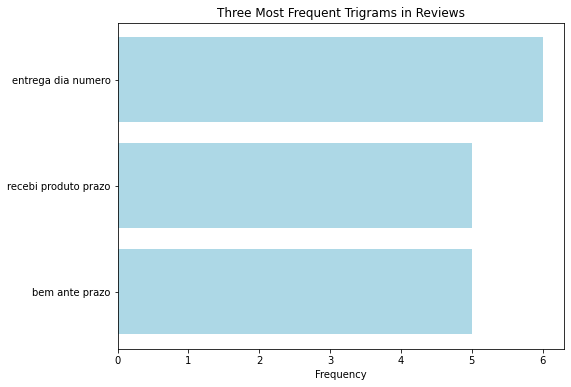

In [42]:
import matplotlib.pyplot as plt

#trigrams
trigrams, counts = zip(*common_trigrams)

#bar chart for the three most frequent trigrams
plt.figure(figsize=(8, 6))
plt.barh([' '.join(trigram) for trigram in trigrams], counts, color='lightblue')
plt.title('Three Most Frequent Trigrams in Reviews')
plt.xlabel('Frequency')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most frequent trigrams at the top
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariakatarachia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


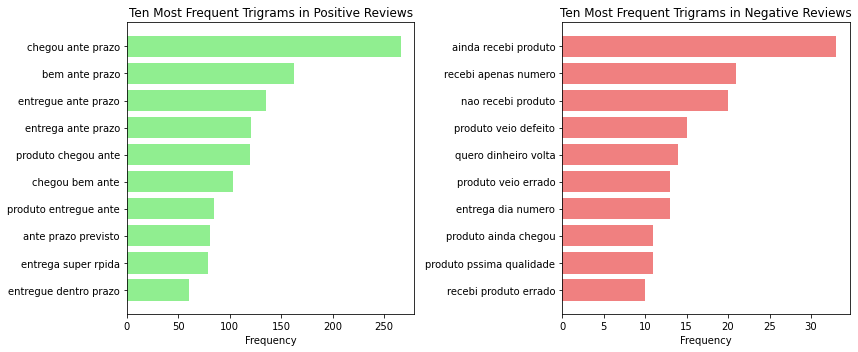

In [43]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.util import ngrams
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

positive_trigrams = [trigram for review in positive_reviews['review_comment_message'] for trigram in ngrams(word_tokenize(review), 3) if all(word.lower() not in stop_words for word in trigram)]
common_trigrams_good = Counter(positive_trigrams).most_common()
negative_trigrams = [trigram for review in negative_reviews['review_comment_message'] for trigram in ngrams(word_tokenize(review), 3) if all(word.lower() not in stop_words for word in trigram)]
common_trigrams_bad = Counter(negative_trigrams).most_common()

#trigrams and their counts for good and bad reviews
trigrams_good, counts_good = zip(*common_trigrams_good[:10])
trigrams_bad, counts_bad = zip(*common_trigrams_bad[:10])

#bar chart for the ten most frequent trigrams in good and bad reviews
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.barh([' '.join(trigram) for trigram in trigrams_good], counts_good, color='lightgreen')
plt.title('Ten Most Frequent Trigrams in Positive Reviews')
plt.xlabel('Frequency')
plt.gca().invert_yaxis() 


plt.subplot(1, 2, 2)
plt.barh([' '.join(trigram) for trigram in trigrams_bad], counts_bad, color='lightcoral')
plt.title('Ten Most Frequent Trigrams in Negative Reviews')
plt.xlabel('Frequency')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


Pie chart about positive, negative and neutral comments.

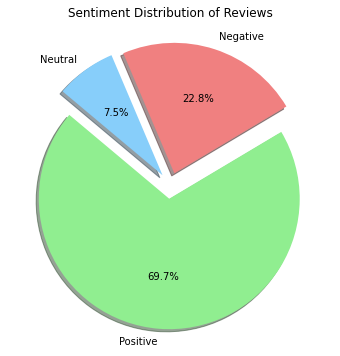

In [44]:
import matplotlib.pyplot as plt

positive_reviews = df[(df['review_score'] == 4) | (df['review_score'] == 5)]
negative_reviews = df[(df['review_score'] == 1) | (df['review_score'] == 2)]
neutral_reviews = df[(df['review_score'] == 3)]

# Count the number of reviews in each sentiment category
positive_count = len(positive_reviews)
negative_count = len(negative_reviews)
neutral_count = len(neutral_reviews)

#pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_count, negative_count, neutral_count]
colors = ['lightgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.1, 0.1)  

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True, explode=explode)
plt.title('Sentiment Distribution of Reviews')
plt.show()


Different tries to plot all the words in a graph, positive and negative, with different fonts.

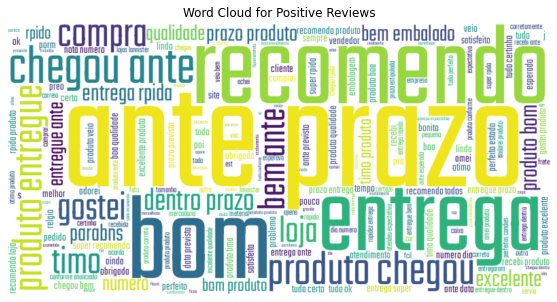

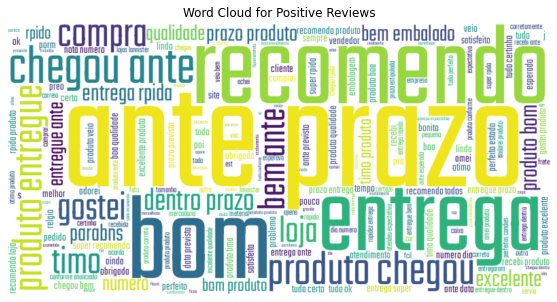

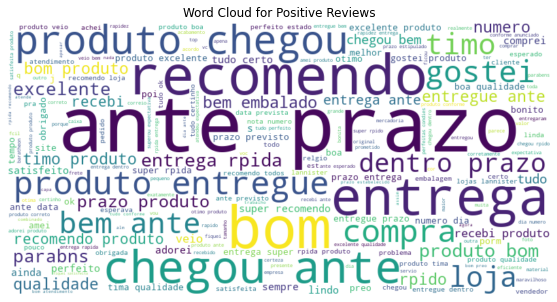

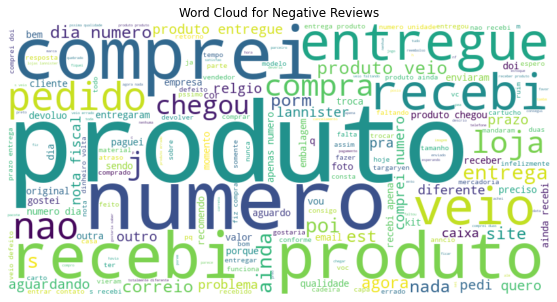

In [45]:
from wordcloud import WordCloud

# Word cloud for positive reviews using a custom font
font_path = '/Users/mariakatarachia/Documents/Business_Analytics_Project/Teko-VariableFont_wght.ttf'

positive_text = ' '.join(positive_reviews['review_comment_message'])
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title ('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

 
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()


# Word cloud for positive reviews
positive_text = ' '.join(positive_reviews['review_comment_message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

# Word cloud for negative reviews
negative_text = ' '.join(negative_reviews['review_comment_message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()


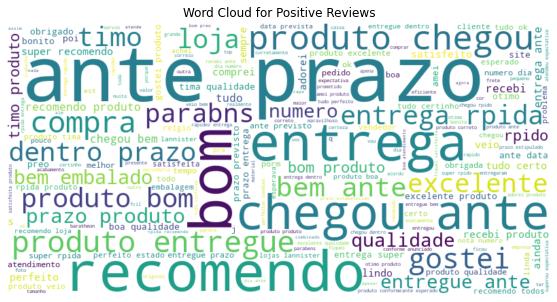

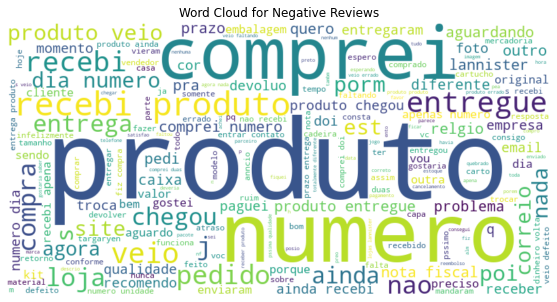

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word cloud for positive reviews
positive_text = ' '.join(positive_reviews['review_comment_message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

# Word cloud for negative reviews
negative_text = ' '.join(negative_reviews['review_comment_message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()


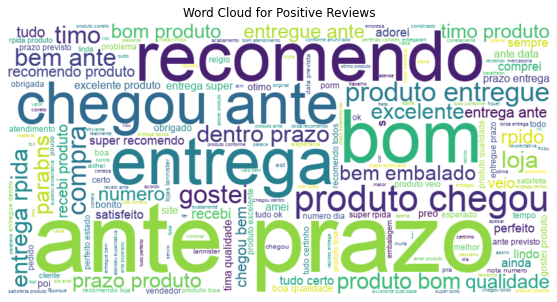

In [47]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Path for the font
font_path = '/Users/mariakatarachia/Downloads/arial/arial.ttf'

# Word cloud for positive reviews
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()


Start trying the analysis, so I used Logistic Regression, Naive Bayes, SVM.

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Split the dataset into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(df['review_comment_message'], df['sentiment'], test_size=0.2, random_state=42)

#vectors
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  
train_tfidf = tfidf_vectorizer.fit_transform(train_texts)
test_tfidf = tfidf_vectorizer.transform(test_texts)

#classifier
classifier = LogisticRegression(random_state=42)
classifier.fit(train_tfidf, train_labels)


predictions = classifier.predict(test_tfidf)


accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

#confusion matrix
print("Classification Report:")
print(classification_report(test_labels, predictions))

print("Confusion Matrix:")
print(confusion_matrix(test_labels, predictions))


Accuracy: 96.80%
Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.12      0.21        25
     Neutral       0.97      1.00      0.98      1790
    Positive       1.00      0.73      0.85       153

    accuracy                           0.97      1968
   macro avg       0.99      0.62      0.68      1968
weighted avg       0.97      0.97      0.96      1968

Confusion Matrix:
[[   3   22    0]
 [   0 1790    0]
 [   0   41  112]]


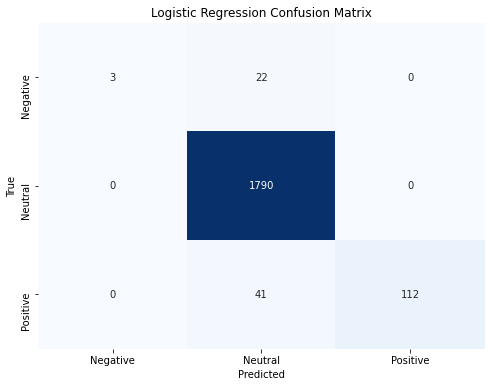

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


#confusion matrix
lr_conf_matrix = confusion_matrix(test_labels, predictions)
lr_class_labels = classifier.classes_
lr_conf_matrix_df = pd.DataFrame(lr_conf_matrix, index=lr_class_labels, columns=lr_class_labels)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(lr_conf_matrix_df, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [50]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

train_texts, test_texts, train_labels, test_labels = train_test_split(df['review_comment_message'], df['sentiment'], test_size=0.2, random_state=42)

#Naive Bayes
nb_model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', MultinomialNB())
])

# Train
nb_model.fit(train_texts, train_labels)

# Predictions
nb_predictions = nb_model.predict(test_texts)

accuracy_nb = accuracy_score(test_labels, nb_predictions)
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")

#confusion matrix
print("Naive Bayes Classification Report:")
print(classification_report(test_labels, nb_predictions))

print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(test_labels, nb_predictions))


Naive Bayes Accuracy: 92.63%
Naive Bayes Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        25
     Neutral       0.93      1.00      0.96      1790
    Positive       1.00      0.22      0.35       153

    accuracy                           0.93      1968
   macro avg       0.64      0.41      0.44      1968
weighted avg       0.92      0.93      0.90      1968

Naive Bayes Confusion Matrix:
[[   0   25    0]
 [   0 1790    0]
 [   0  120   33]]


/Users/mariakatarachia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


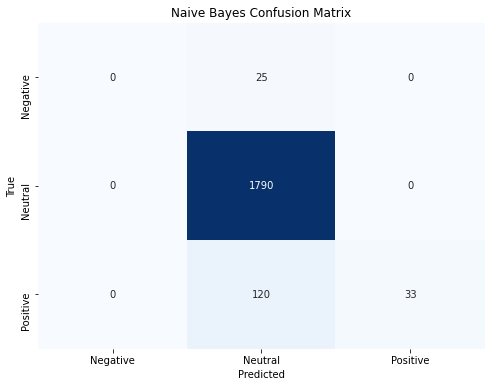

In [51]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#confusion matrix
nb_conf_matrix = confusion_matrix(test_labels, nb_predictions)
nb_class_labels = nb_model.classes_
nb_conf_matrix_df = pd.DataFrame(nb_conf_matrix, index=nb_class_labels, columns=nb_class_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix_df, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [52]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

train_texts, test_texts, train_labels, test_labels = train_test_split(df['review_comment_message'], df['sentiment'], test_size=0.2, random_state=42)

#svm model
svm_model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LinearSVC())
])

# Train
svm_model.fit(train_texts, train_labels)

# Predictions
svm_predictions = svm_model.predict(test_texts)

accuracy_svm = accuracy_score(test_labels, svm_predictions)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

#confusion matrix
print("SVM Classification Report:")
print(classification_report(test_labels, svm_predictions))

print("SVM Confusion Matrix:")
print(confusion_matrix(test_labels, svm_predictions))



SVM Accuracy: 98.98%
SVM Classification Report:
              precision    recall  f1-score   support

    Negative       0.94      0.68      0.79        25
     Neutral       0.99      1.00      0.99      1790
    Positive       1.00      0.92      0.96       153

    accuracy                           0.99      1968
   macro avg       0.98      0.87      0.91      1968
weighted avg       0.99      0.99      0.99      1968

SVM Confusion Matrix:
[[  17    8    0]
 [   0 1790    0]
 [   1   11  141]]


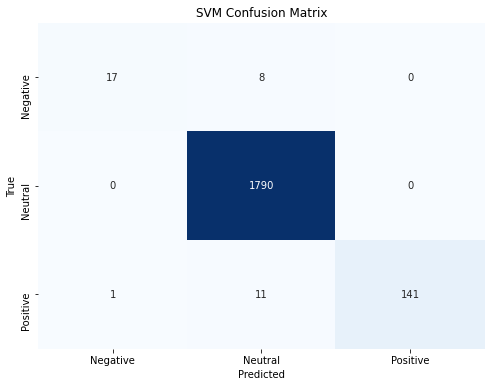

In [53]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#confusion matrix
svm_conf_matrix = confusion_matrix(test_labels, svm_predictions)
svm_class_labels = svm_model.classes_
svm_conf_matrix_df = pd.DataFrame(svm_conf_matrix, index=svm_class_labels, columns=svm_class_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix_df, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [54]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

train_texts, test_texts, train_labels, test_labels = train_test_split(df['review_comment_message'], df['sentiment'], test_size=0.2, random_state=42)

#models
logreg_model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LogisticRegression())
])

nb_model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', MultinomialNB())
])

svm_model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LinearSVC())
])

#ensemble model using a VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('logreg', logreg_model),
    ('nb', nb_model),
    ('svm', svm_model)
], voting='hard')  

# Train
ensemble_model.fit(train_texts, train_labels)

# Predictions
ensemble_predictions = ensemble_model.predict(test_texts)

accuracy_ensemble = accuracy_score(test_labels, ensemble_predictions)
print(f"Ensemble Model Accuracy: {accuracy_ensemble * 100:.2f}%")

#confusion matrix
print("Ensemble Model Classification Report:")
print(classification_report(test_labels, ensemble_predictions))

print("Ensemble Model Confusion Matrix:")
print(confusion_matrix(test_labels, ensemble_predictions))


Ensemble Model Accuracy: 96.80%
Ensemble Model Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.12      0.21        25
     Neutral       0.97      1.00      0.98      1790
    Positive       1.00      0.73      0.85       153

    accuracy                           0.97      1968
   macro avg       0.99      0.62      0.68      1968
weighted avg       0.97      0.97      0.96      1968

Ensemble Model Confusion Matrix:
[[   3   22    0]
 [   0 1790    0]
 [   0   41  112]]


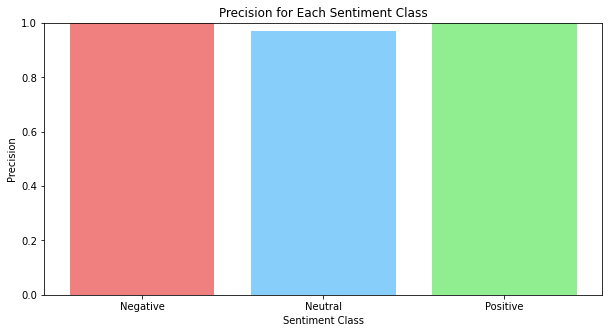

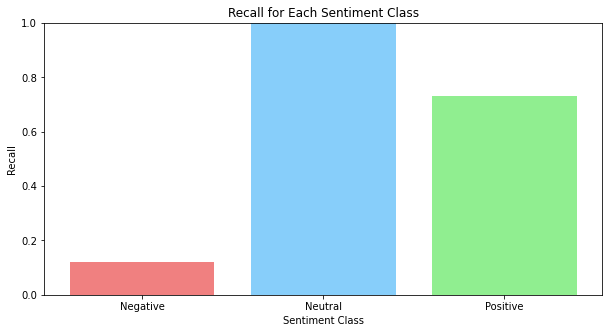

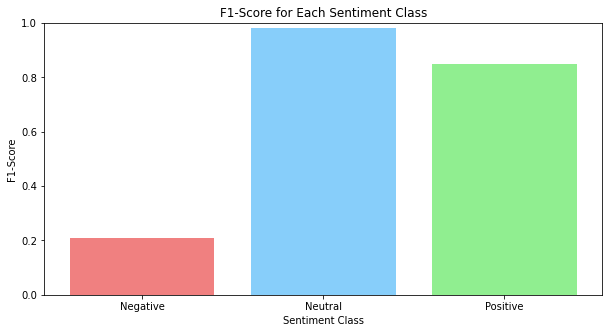

In [55]:
import matplotlib.pyplot as plt
import numpy as np

precision = [1.00, 0.97, 1.00]  
recall = [0.12, 1.00, 0.73]  
f1_score = [0.21, 0.98, 0.85]  
categories = ['Negative', 'Neutral', 'Positive']

# Bar plot for precision
plt.figure(figsize=(10, 5))
plt.bar(categories, precision, color=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Precision for Each Sentiment Class')
plt.xlabel('Sentiment Class')
plt.ylabel('Precision')
plt.ylim(0, 1)  
plt.show()

# Bar plot for recall
plt.figure(figsize=(10, 5))
plt.bar(categories, recall, color=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Recall for Each Sentiment Class')
plt.xlabel('Sentiment Class')
plt.ylabel('Recall')
plt.ylim(0, 1)  
plt.show()

# Bar plot for F1-score
plt.figure(figsize=(10, 5))
plt.bar(categories, f1_score, color=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('F1-Score for Each Sentiment Class')
plt.xlabel('Sentiment Class')
plt.ylabel('F1-Score')
plt.ylim(0, 1)  
plt.show()


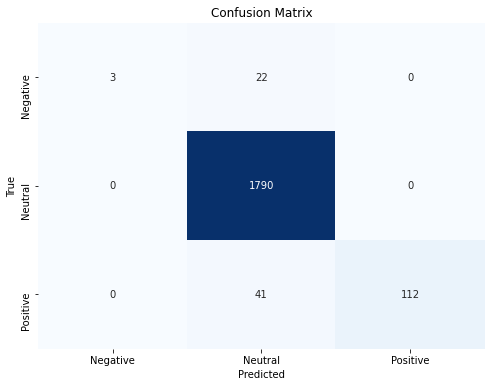

In [56]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Confusion matrix results
conf_matrix = np.array([[3, 22, 0],
                        [0, 1790, 0],
                        [0, 41, 112]])

class_labels = ['Negative', 'Neutral', 'Positive']
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
